In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D

In [21]:
from keras.applications import ResNet50V2
resnet = ResNet50V2(include_top= False,input_shape=(224,224,3),weights='imagenet')

In [22]:
for layer in resnet.layers:
 resnet.trainable = False

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [8]:
!kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 99% 205M/207M [00:07<00:00, 27.9MB/s]
100% 207M/207M [00:07<00:00, 27.3MB/s]


In [9]:
import zipfile
with zipfile.ZipFile('covid-face-mask-detection-dataset.zip','r') as zip_ref:
  zip_ref.extractall('covid-face-mask-detection-dataset')

In [46]:
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,vertical_flip=True,fill_mode='nearest')
validation_data = ImageDataGenerator(rescale= 1./255,validation_split=0.2)
test_data = ImageDataGenerator(rescale=1./255)

In [55]:
train_dataset = train_data.flow_from_directory(directory='/content/covid-face-mask-detection-dataset/New Masks Dataset/Train',target_size=(224,224),class_mode='categorical',batch_size=64)

Found 600 images belonging to 2 classes.


In [63]:
test_dataset = test_data.flow_from_directory(directory='/content/covid-face-mask-detection-dataset/New Masks Dataset/Test',batch_size=64,target_size=(224,224),class_mode='categorical')

Found 100 images belonging to 2 classes.


In [56]:
validation_dataset = validation_data.flow_from_directory(directory='/content/covid-face-mask-detection-dataset/New Masks Dataset/Validation',batch_size=64,target_size=(224,224),class_mode='categorical')

Found 306 images belonging to 2 classes.


In [57]:
x = Flatten()(resnet.output)
pred= Dense(2,activation='softmax')(x)
model = keras.models.Model(inputs= resnet.input,outputs = pred)

In [58]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [59]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [61]:
hist = model.fit(train_dataset,validation_data=validation_dataset,epochs = 5)

Epoch 1/5
10/10 [==============================] - 187s 20s/step - loss: 0.2302 - accuracy: 0.9800 - val_loss: 0.1428 - val_accuracy: 0.9804
Epoch 2/5
10/10 [==============================] - 141s 14s/step - loss: 0.1029 - accuracy: 0.9867 - val_loss: 0.1115 - val_accuracy: 0.9902
Epoch 3/5
10/10 [==============================] - 140s 14s/step - loss: 0.0936 - accuracy: 0.9883 - val_loss: 0.1426 - val_accuracy: 0.9869
Epoch 4/5
10/10 [==============================] - 139s 14s/step - loss: 0.0746 - accuracy: 0.9917 - val_loss: 0.1376 - val_accuracy: 0.9869
Epoch 5/5
10/10 [==============================] - 140s 14s/step - loss: 0.0735 - accuracy: 0.9917 - val_loss: 0.1310 - val_accuracy: 0.9902


In [64]:
model.evaluate(test_dataset,verbose = 1)

2/2 [==============================] - 16s 5s/step - loss: 0.0831 - accuracy: 0.9900


[0.08308495581150055, 0.9900000095367432]

Text(0.5, 1.0, 'Accuracy')

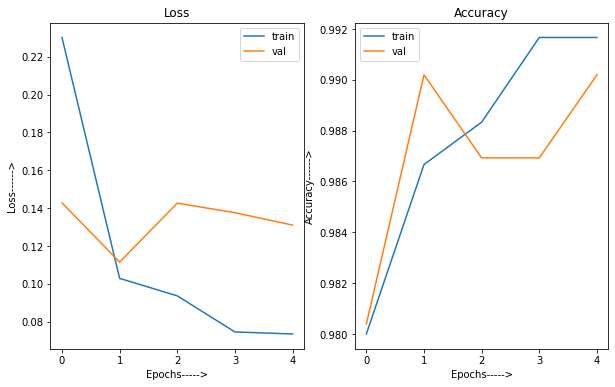

In [65]:
import matplotlib.pyplot as plt

df = pd.DataFrame(hist.history)
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(df[['loss','val_loss']])
plt.xlabel("Epochs----->")
plt.ylabel("Loss------>")
plt.legend(['train','val'])
plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(df[['accuracy','val_accuracy']])
plt.xlabel("Epochs----->")
plt.ylabel("Accuracy------>")
plt.legend(['train','val'])
plt.title("Accuracy")

In [66]:
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.230162,0.980000,0.142779,0.980392
1,0.102883,0.986667,0.111494,0.990196
2,0.093644,0.988333,0.142627,0.986928
3,0.074576,0.991667,0.137589,0.986928
4,0.073507,0.991667,0.131040,0.990196
